In [1]:
!pip install pandas numpy matplotlib seaborn textblob wordcloud
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("student_feedback_raw.csv")
df.head()

Saving student_feedback_raw.csv to student_feedback_raw.csv


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

,0
Unnamed: 0,0
Student ID,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
rating_cols = [c for c in df.columns if c != 'Student ID']
df[rating_cols] = df[rating_cols].apply(pd.to_numeric, errors='coerce')

In [9]:
row_missing = df[rating_cols].isnull().sum(axis=1)
threshold = len(rating_cols) // 2
df = df[row_missing <= threshold]

df[rating_cols] = df[rating_cols].apply(lambda row: row.fillna(row.mean()), axis=1)

In [10]:
df[rating_cols].describe()

,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


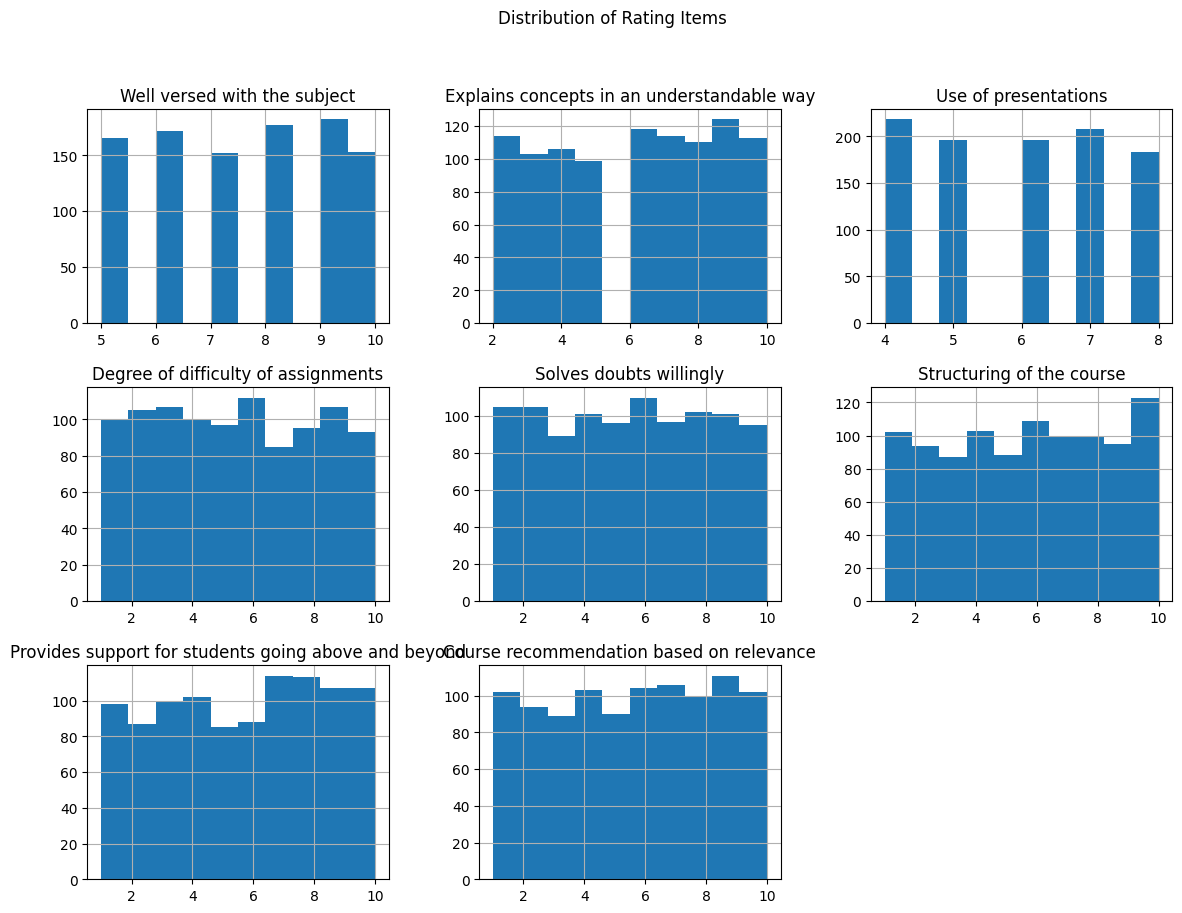

In [11]:
df[rating_cols].hist(bins=10, figsize=(14,10))
plt.suptitle("Distribution of Rating Items")
plt.show()

In [12]:
df['Overall_Score'] = df[rating_cols].mean(axis=1)
df['Overall_Score'].describe()

,Overall_Score
count,1001.000000
mean,5.915460
std,0.894734
min,3.375000
25%,5.250000
50%,5.875000
75%,6.625000
max,8.250000


In [13]:
corr = df[rating_cols].corr()

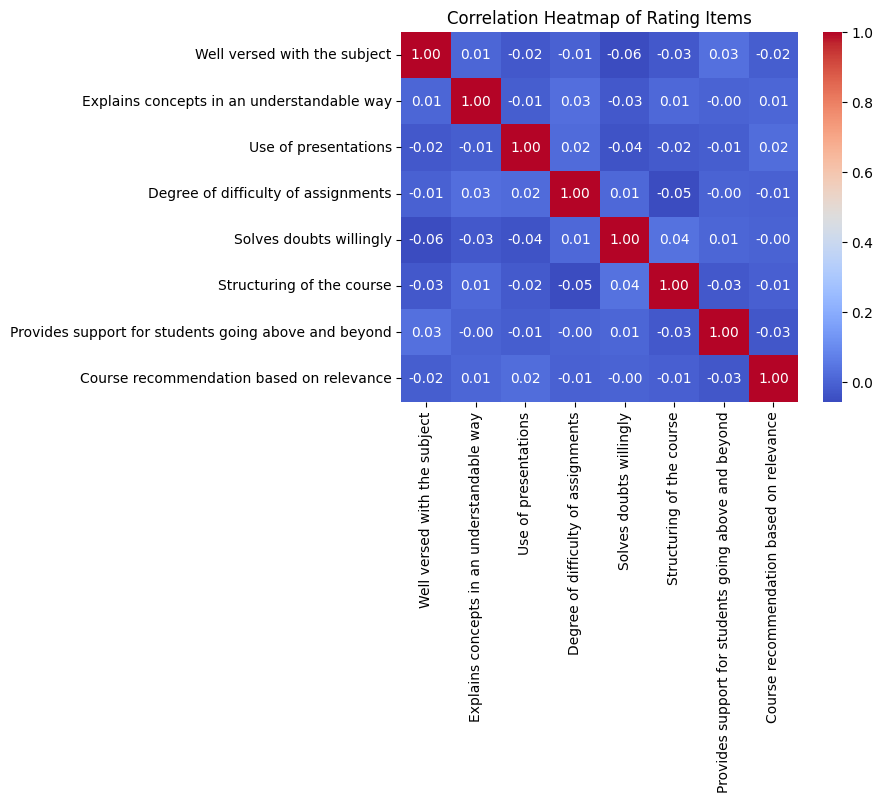

In [14]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Rating Items")
plt.show()

In [15]:
item_means = df[rating_cols].mean().sort_values(ascending=False)
item_means

,0
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058
Provides support for students going above and beyond,5.662338
Structuring of the course,5.636364
Course recommendation based on relevance,5.598402
Solves doubts willingly,5.474525
Degree of difficulty of assignments,5.430569


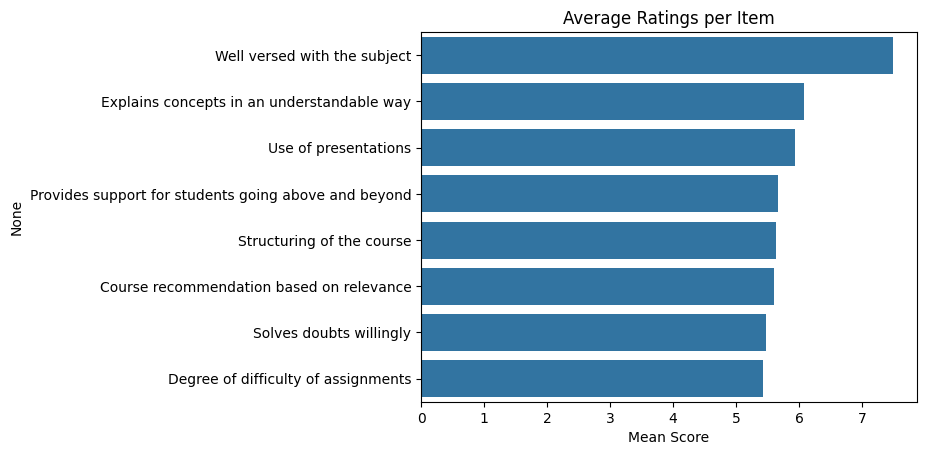

In [16]:
sns.barplot(x=item_means.values, y=item_means.index)
plt.title("Average Ratings per Item")
plt.xlabel("Mean Score")
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(df[rating_cols])

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled)

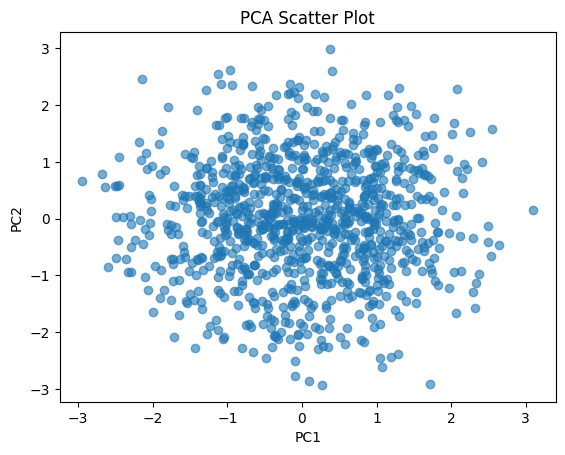

In [19]:
plt.scatter(pca_components[:,0], pca_components[:,1], alpha=0.6)
plt.title("PCA Scatter Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

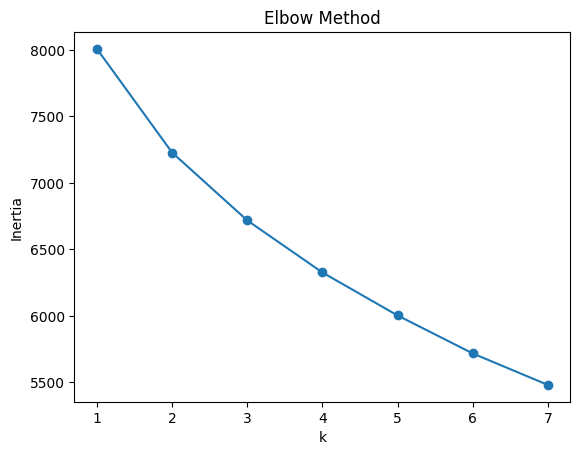

In [20]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1,8):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    inertia.append(km.fit(scaled).inertia_)

plt.plot(range(1,8), inertia, '-o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

In [21]:
km = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = km.fit_predict(scaled)

In [22]:
df.groupby('Cluster')[rating_cols + ['Overall_Score']].mean()

,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Overall_Score
Cluster,,,,,,,,,
0,7.407625,6.134897,6.114370,8.260997,6.011730,4.780059,6.730205,5.621701,6.382698
1,7.401869,5.563863,5.616822,3.211838,5.373832,6.445483,7.769470,5.152648,5.816978
2,7.678466,6.519174,6.076696,4.684366,5.029499,5.731563,2.592920,5.997050,5.538717
